In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

In [3]:
boulder_data = pd.read_csv("~/Desktop/coding/boulder_data/boulderdata.csv")

In [4]:
boulder_data.head()

,gym_name,current_time,occupancy,waiting,weather_temp,weather_status
0,regensburg,2020/10/29 17:00,68.0,0.0,7.42,Rain
1,muenchen-west,2020/10/29 17:00,27.0,0.0,9.09,Rain
2,frankfurt,2020/10/29 17:00,59.0,0.0,10.75,Rain
3,dortmund,2020/10/29 17:00,11.0,0.0,9.99,Rain
4,muenchen-ost,2020/10/29 17:00,100.0,14.0,9.09,Rain


In [5]:
def avg_data_day(chosen_day, chosen_gym):
    """returns the all of the data for a specific day of the week, for a specific gym"""

    #returns a number for the chosen day
    chosen_day = chosen_day.lower()
    day_dict = {'monday': 0, 'tuesday': 1, 'wednesday': 2, 'thursday': 3, 'friday': 4, 'saturday': 5,'sunday': 6}
    day_num = day_dict[chosen_day]
    
    # returns all data for a specific day
    list_of_data = []
    for x in boulder_data.current_time.unique():
        date = x
        day = datetime.strptime(date, '%Y/%m/%d %H:%M').weekday()
        if day == day_num:
            list_of_data.append(x)
    ave_day_data = boulder_data[boulder_data['current_time'].isin(list_of_data)]

    # filters df for specific gym
    ave_data = ave_day_data[ave_day_data['gym_name'] == chosen_gym]

    # clean df to have time in a separate column, prep for next step
    ave_data[['date', 'time']] = ave_data['current_time'].str.split(' ', 1, expand=True)
    ave_data.drop(['gym_name', 'current_time', 'date'], inplace=True, axis=1)
    ave_data = ave_data[['time', 'occupancy', 'waiting', 'weather_temp', 'weather_status']]

    # create new df with average data
    final_df = {
        'time': [],
        'occupancy': [],
        'waiting': [],
        'weather_temp': [],
        'weather_status': []
    }

    for t in ave_data.time.unique():
        for_time = ave_data[ave_data['time'] == t]
        final_df['time'].append(t)
        final_df['occupancy'].append(for_time['occupancy'].mean())
        final_df['waiting'].append(for_time['waiting'].mean())
        final_df['weather_temp'].append(for_time['weather_temp'].mean())
        final_df['weather_status'].append(for_time['weather_status'].max())

    final_df = pd.DataFrame(data=final_df)
    final_df.sort_values(by=['time'], inplace=True)

    return final_df

In [10]:
mon_muenchen_ost = avg_data_day('Monday', 'muenchen-ost')
fri_muenchen_ost = avg_data_day('Friday', 'muenchen-ost')
sat_muenchen_ost = avg_data_day('Saturday', 'muenchen-ost')

mon_dortmund = avg_data_day('Monday', 'dortmund')
fri_dortmund = avg_data_day('Friday', 'dortmund')
sat_dortmund = avg_data_day('Saturday', 'dortmund')



In [18]:
def plot_ave_data(df):
    plt.plot( 'time', 'occupancy', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.plot( 'time', 'waiting', data=df, marker='', color='olive', linewidth=2)
    plt.plot( 'time', 'weather_temp', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="temp")
    plt.legend()

## Plots

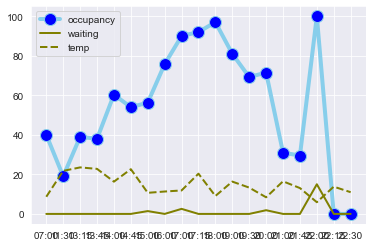

In [19]:
plot_ave_data(mon_muenchen_ost)


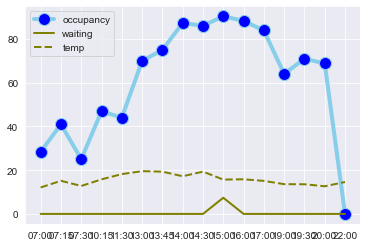

In [20]:
plot_ave_data(fri_muenchen_ost)

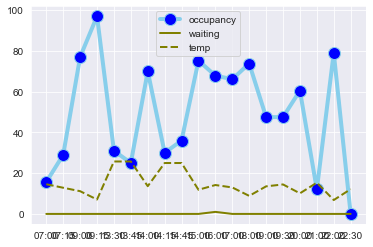

In [21]:
plot_ave_data(sat_muenchen_ost)


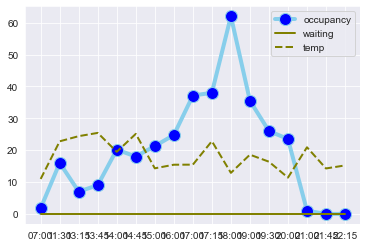

In [22]:
plot_ave_data(mon_dortmund)

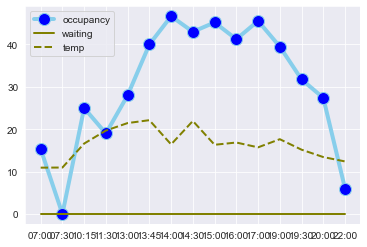

In [23]:
plot_ave_data(fri_dortmund)

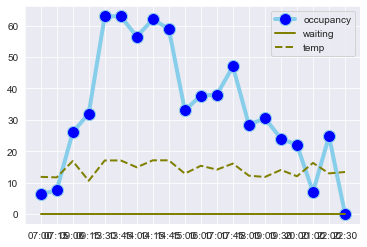

In [24]:
plot_ave_data(sat_dortmund)